In [238]:
# Importing libraries

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data into python

In [240]:
data = pd.read_csv('student-data.csv')

In [241]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [242]:
data.shape

(395, 31)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [244]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


# Check for null values

In [245]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [246]:
# Checking if this is a balanced dataset 

In [247]:
data['passed'].value_counts(normalize=True)

yes    0.670886
no     0.329114
Name: passed, dtype: float64

In [248]:
# Pre processing

In [249]:
X= data.drop(['passed'],axis=1)
y =data['passed']

In [250]:
# Applying Label Encoding for the categorical features which are ordinal

In [251]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
y=label_en.fit_transform(y)
label_encoders = {}
ordinal_features= ['school','sex','address','famsize','Pstatus',
                  'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']   

for i in ordinal_features:
    label_encoders[i] = LabelEncoder()
    X[i] = label_encoders[i].fit_transform(X[i]) 
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,at_home,teacher,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,at_home,other,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,at_home,other,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,health,services,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,other,other,...,1,0,0,4,3,2,1,2,5,4


In [252]:
# Applying One Hot Encoding for the categorical features which are not ordinal

In [253]:
X=pd.get_dummies(X)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [254]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [255]:
# Show the results of the split
X_train.shape

(316, 43)

In [256]:
#Finding the most effective model that uses the least amount of computation costs to save on the budget

# 1.Logistic regression model

In [257]:
results_arr = {'Accuracy':[],'Precision':[],'Recall':[],'F1_Score':[],'Failure%':[],'Time_Taken':[]}

In [258]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
start_time = time.time()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
logit_reg=LogisticRegression()
model=logit_reg.fit(X_train,y_train)
predictions=model.predict(X_test)
end_time = time.time()

C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [259]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time
results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)
results_arr['Time_Taken'].append(time_taken)
print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for Logistic Regression = ',time_taken, ' seconds')

Accuracy is 0.7088607594936709
precision is 0.7301587301587301
recall is 0.8846153846153846
f1_score is 0.7999999999999999
[[10 17]
 [ 6 46]]
% of students failing after intervention =  7.59493670886076
Time taken for Logistic Regression =  0.059191226959228516  seconds


# 2. KNN Model

Text(0, 0.5, 'accuracy')

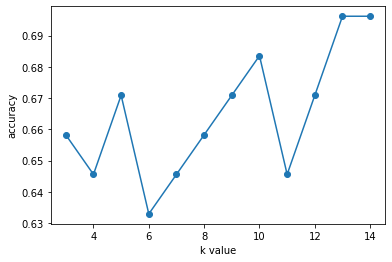

In [260]:
from sklearn.neighbors import KNeighborsClassifier
values=[]
start_time = time.time()
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    predictions=classifier.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    values.append(acc)
plt.plot(neighbors,values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [261]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
end_time = time.time()

In [262]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)
results_arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for KNN = ',time_taken, ' seconds')

Accuracy is 0.6962025316455697
precision is 0.6944444444444444
recall is 0.9615384615384616
f1_score is 0.8064516129032258
[[ 5 22]
 [ 2 50]]
% of students failing after intervention =  2.5316455696202533
Time taken for KNN =  0.44019556045532227  seconds


# 3. Decision Tree

In [263]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions=dt_model.predict(X_test)
end_time = time.time()

In [264]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)
results_arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for Decision Tree = ',time_taken, ' seconds')

Accuracy is 0.6455696202531646
precision is 0.7
recall is 0.8076923076923077
f1_score is 0.75
[[ 9 18]
 [10 42]]
% of students failing after intervention =  12.658227848101266
Time taken for Decision Tree =  0.009516716003417969  seconds


# 4. SVM

In [265]:
from sklearn.svm import SVC
start_time = time.time()
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
predictions=svm_linear.predict(X_test)
end_time = time.time()

In [266]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)
results_arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for SVM = ',time_taken, ' seconds')

Accuracy is 0.6962025316455697
precision is 0.7258064516129032
recall is 0.8653846153846154
f1_score is 0.7894736842105263
[[10 17]
 [ 7 45]]
% of students failing after intervention =  8.860759493670885
Time taken for SVM =  0.04988431930541992  seconds


# 5. Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
end_time = time.time()

In [268]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)
results_arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for Random Forest = ',time_taken, ' seconds')

Accuracy is 0.6708860759493671
precision is 0.6857142857142857
recall is 0.9230769230769231
f1_score is 0.7868852459016394
[[ 5 22]
 [ 4 48]]
% of students failing after intervention =  5.063291139240507
Time taken for Random Forest =  0.31089186668395996  seconds


In [269]:
print ("{:<12} | {:<12} | {:<12} | {:<12} | {:<12} | {:<12}".format('Item', 'LR', 'KNN','DT', 'SVM','RF'))
print('-'*80) 


for key, value in results_arr.items():
    a1, a2, a3, a4, a5 = value
    a1 = np.round(a1,3)
    a2 = np.round(a2,3)
    a3 = np.round(a3,3)
    a4 = np.round(a4,3)
    a5 = np.round(a5,3)
    print ("{:<12} | {:<12} | {:<12} | {:<12} | {:<12} | {:<12}".format(key, a1, a2, a3, a4, a5))

Item         | LR           | KNN          | DT           | SVM          | RF          
--------------------------------------------------------------------------------
Accuracy     | 0.709        | 0.696        | 0.646        | 0.696        | 0.671       
Precision    | 0.73         | 0.694        | 0.7          | 0.726        | 0.686       
Recall       | 0.885        | 0.962        | 0.808        | 0.865        | 0.923       
F1_Score     | 0.8          | 0.806        | 0.75         | 0.789        | 0.787       
Failure%     | 7.595        | 2.532        | 12.658       | 8.861        | 5.063       
Time_Taken   | 0.059        | 0.44         | 0.01         | 0.05         | 0.311       


In [270]:
# Random Forest model gives the best F1 score, where as Decision tree model has the low F1 score
# Failure percentage is less for KNN model
# Decision tree model takes less time
# Accuracy is high for Logistic Regression and Random forest model